## Функции Активации

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## MLP

## Данные

In [2]:
import torchvision as tv
import time

In [13]:
BATCH_SIZE=256
device = "cuda" if torch.cuda.is_available() else "cpu"

In [19]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

train_dataset.train_data.to(device)
train_dataset.train_labels.to(device)

test_dataset.test_data.to(device)
train_dataset.test_labels.to(device)

tensor([5, 0, 4,  ..., 5, 6, 8])

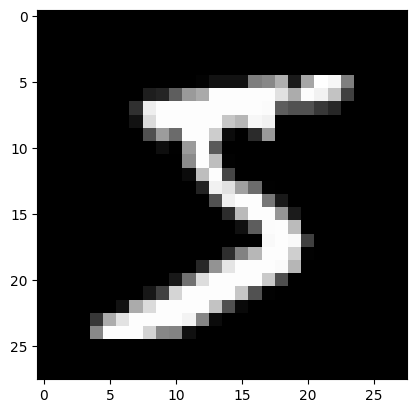

In [5]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [6]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

## Модель

In [17]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),

    torch.nn.ReLU(),

    torch.nn.Linear(256, 10)

).to(device)

In [18]:
model.state_dict()

OrderedDict([('1.weight',
              tensor([[ 0.0221, -0.0061, -0.0046,  ...,  0.0053,  0.0145,  0.0281],
                      [-0.0246,  0.0105,  0.0273,  ...,  0.0003,  0.0237,  0.0045],
                      [ 0.0150,  0.0193, -0.0170,  ...,  0.0206,  0.0043, -0.0055],
                      ...,
                      [-0.0017, -0.0040,  0.0117,  ..., -0.0225, -0.0151,  0.0157],
                      [ 0.0012, -0.0145, -0.0216,  ..., -0.0071, -0.0210, -0.0331],
                      [-0.0233, -0.0042,  0.0047,  ..., -0.0314,  0.0173, -0.0199]])),
             ('1.bias',
              tensor([ 0.0107, -0.0341,  0.0156, -0.0090, -0.0289,  0.0252, -0.0173,  0.0283,
                      -0.0241, -0.0245,  0.0159, -0.0306,  0.0263, -0.0084,  0.0004, -0.0350,
                       0.0293,  0.0211, -0.0294,  0.0320, -0.0243, -0.0291,  0.0234,  0.0048,
                      -0.0323, -0.0204,  0.0324,  0.0115, -0.0262, -0.0088, -0.0224, -0.0203,
                      -0.0303,  0.0351, 

In [10]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=.01)
# trainer = torch.optim.Adam(model.parameters(), lr=.01)
num_epochs = 10

In [11]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()
    
    model.train()

    for X, y in train:
        trainer.zero_grad()

        y_pred = model(X)

        l = loss(y_pred, y)
        l.backward()

        trainer.step()

        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()

        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()

    for X, y in test:
        y_pred = model(X)

        l = loss(y_pred, y)

        test_loss += l.item()

        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1

        test_passed += len(X)
        
    print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, taked: 7.591, train_loss: 2.0367799647310947, train_acc: 0.5815333333333333, test_loss: 1.6728292882442475, test_acc: 0.7624
ep: 1, taked: 7.163, train_loss: 1.3228253004398751, train_acc: 0.7844, test_loss: 0.9938917249441147, test_acc: 0.8237
ep: 2, taked: 7.128, train_loss: 0.8554999721811173, train_acc: 0.82835, test_loss: 0.7031305260956288, test_acc: 0.85
ep: 3, taked: 7.223, train_loss: 0.6579810609208777, train_acc: 0.8509666666666666, test_loss: 0.5715175073593854, test_acc: 0.8666
ep: 4, taked: 7.277, train_loss: 0.5586896357384133, train_acc: 0.8648, test_loss: 0.4980107232928276, test_acc: 0.8789
ep: 5, taked: 7.015, train_loss: 0.4993258491475531, train_acc: 0.8744833333333333, test_loss: 0.4512976109981537, test_acc: 0.8866
ep: 6, taked: 7.002, train_loss: 0.4598706865564306, train_acc: 0.88085, test_loss: 0.41910808328539134, test_acc: 0.892
ep: 7, taked: 7.089, train_loss: 0.43171432582621877, train_acc: 0.8859, test_loss: 0.3955828368663788, test_acc: 0.8957
ep:

## Практика - попробуйте заменить SGD на Adam и RMSProp. Увеличиться ли скорость сходимости?

## Практика - попробуйте сделать больше слоев в сети  - увеличиться ли качество?

## Практика - попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?